# Part 1 - Exploratory Data Analysis

## Conclusion
I definitely can see the patterns in daily cycles:    
Logins are greater on the weekends than during the work week days.

On the weekends logins going up around midnight till 04:00, than going down till 10:00, and going back up again up to sound 15:00. This activities could be due to weekends late night life style.

On weekdays there is a much lower volume of logins at night hours, and highest number of logins around Noon approximately from 9:00 to 11:00.

Also March has the highest volume of logins

Text(0.5, 1.0, 'Week Days Logins Over Time')

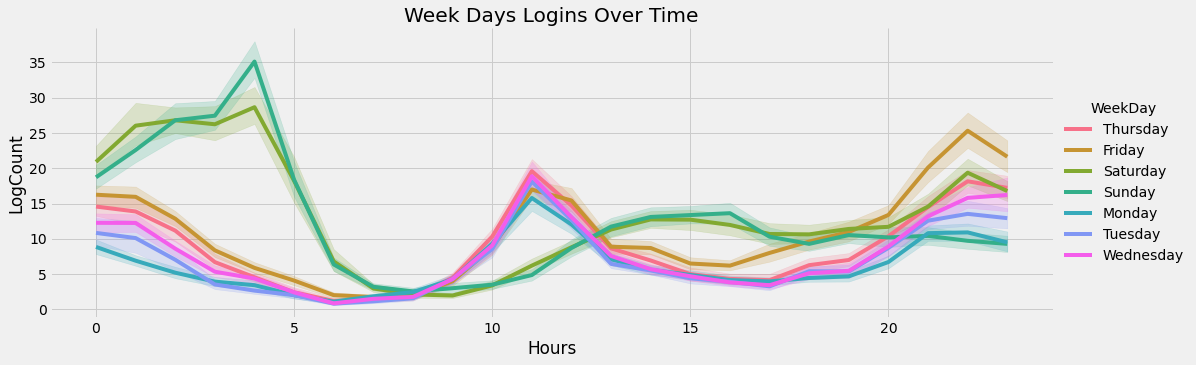

In [47]:
sns.relplot(data=df_Hours, x = 'Hours', y= 'LogCount', kind='line',hue='WeekDay',aspect=15/5)
plt.title('Week Days Logins Over Time')

# CODE

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.set_index('login_time', inplace=True)
df['LogCount'] = 1
df.head()

,LogCount
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
df_15m = df.resample('15min').sum()
df_15m.head()

,LogCount
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df_15m['WeekDay'] = pd.DatetimeIndex(df_15m.index).day_name()
df_15m['Month']=pd.DatetimeIndex(df_15m.index).month_name()
df_15m.head()

,LogCount,WeekDay,Month
login_time,,,
1970-01-01 20:00:00,2,Thursday,January
1970-01-01 20:15:00,6,Thursday,January
1970-01-01 20:30:00,9,Thursday,January
1970-01-01 20:45:00,7,Thursday,January
1970-01-01 21:00:00,1,Thursday,January


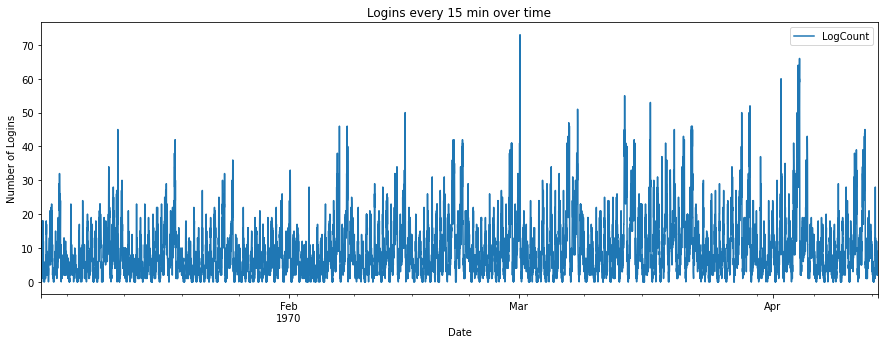

In [7]:
df_15m.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line')
plt.title('Logins every 15 min over time')
plt.show()

In [8]:
df_day = df.resample('D').sum()
df_day.head()

,LogCount
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


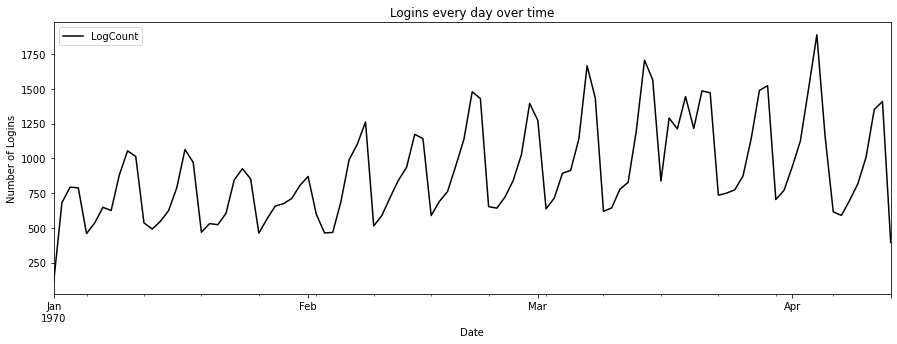

In [9]:
df_day.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line', color='k')
plt.title('Logins every day over time')
plt.show()

In [10]:
df_week = df.resample('W').sum()
df_week.head()

,LogCount
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


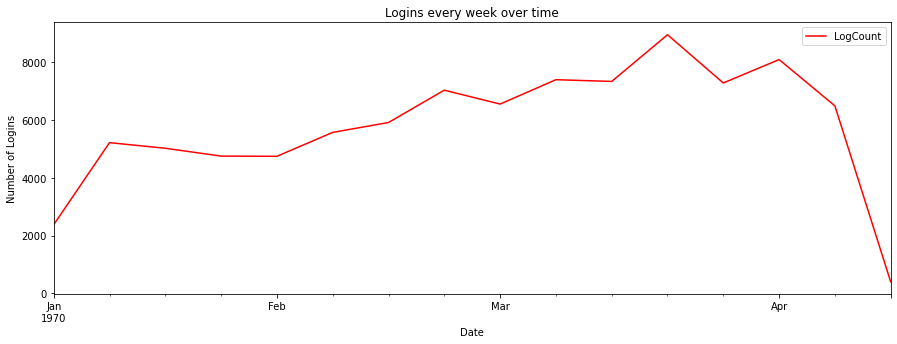

In [11]:
df_week.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line', color='r',)
plt.title('Logins every week over time')
plt.show()

1970-01-19 - Monday     
I will take 2 weeks (Monday through Sunday) to see if we have any patterns

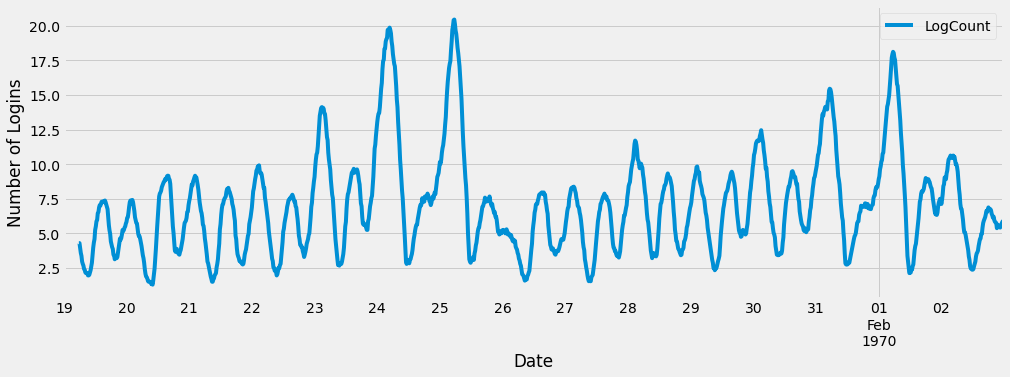

In [12]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-19':'1970-02-2'].rolling(window=24).mean().plot(figsize=(15,5), 
                                                                     xlabel='Date',ylabel='Number of Logins')
plt.show()

I can observe higher volume on the weekends than on the week days.

Let's take closer look at the weekend

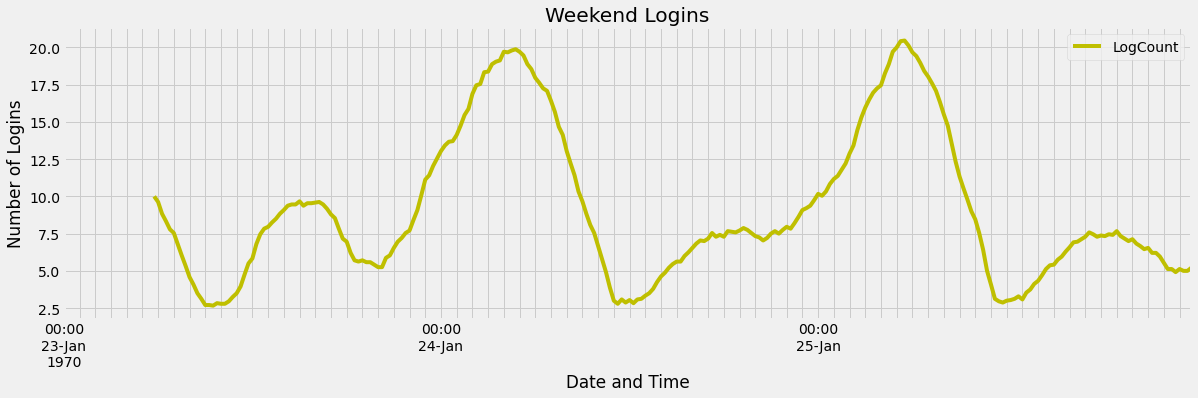

In [13]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-23':'1970-01-25'].rolling(window=24).mean().plot(figsize=(18,5), color='y',title = 'Weekend Logins',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
plt.xticks(np.arange(datetime(1970,1,23), datetime(1970,1,26), timedelta(hours=1)).astype(datetime))
plt.show()

Let's take closer look at the week days

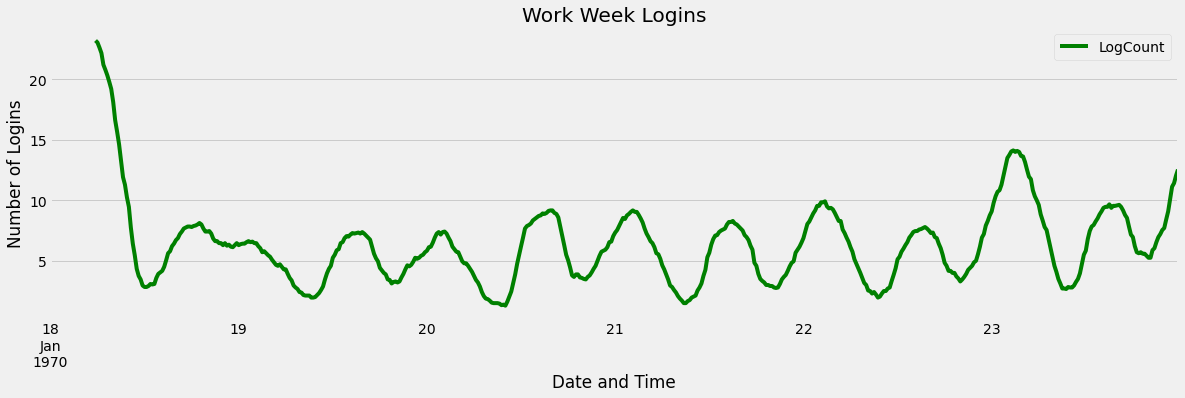

In [14]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-18':'1970-01-23'].rolling(window=24).mean().plot(figsize=(18,5), color='g',
                                                                     title= 'Work Week Logins',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
plt.show()

Comparing work week day by day

<AxesSubplot:title={'center':'Friday, Jen 23, 1970'}, xlabel='Date and Time', ylabel='Number of Logins'>

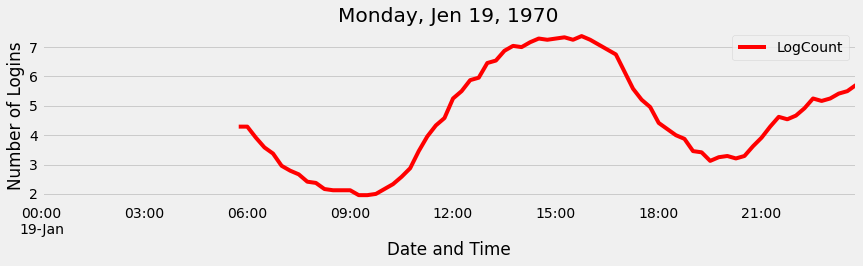

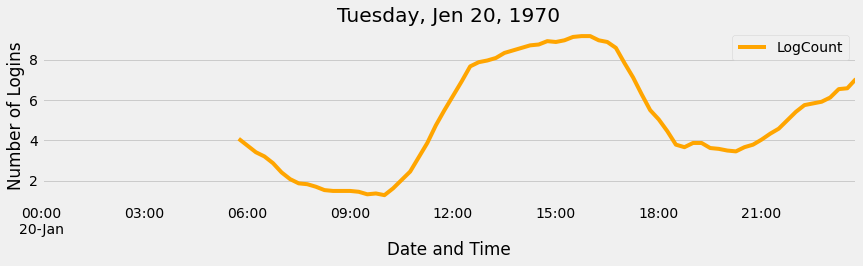

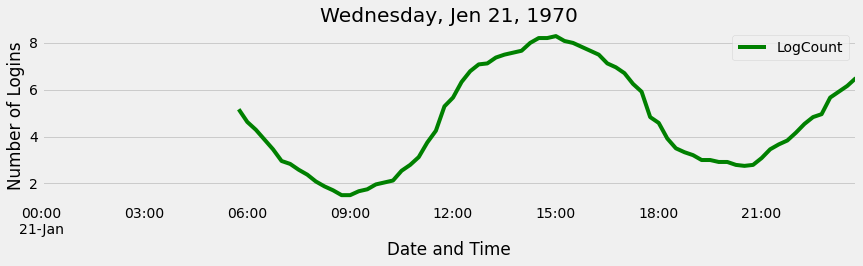

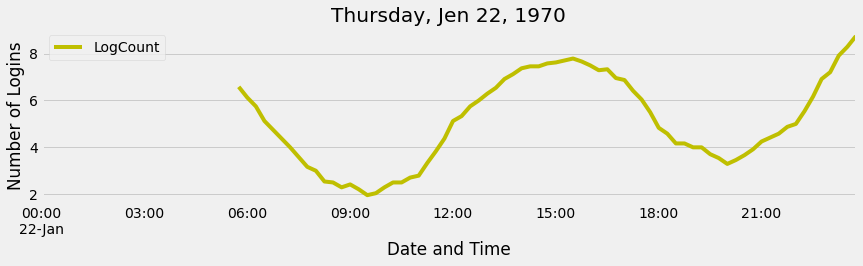

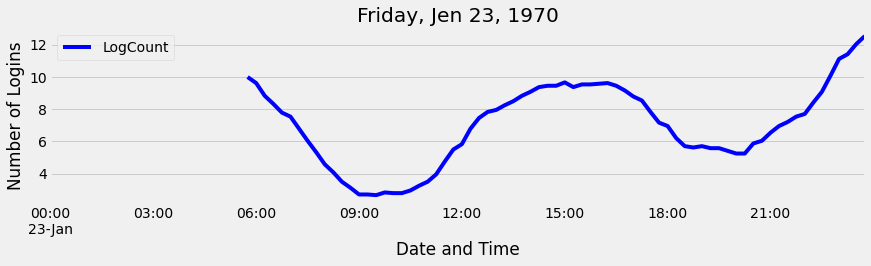

In [15]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-19'].rolling(window=24).mean().plot(figsize=(13,3), color='r', title= 'Monday, Jen 19, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-20'].rolling(window=24).mean().plot(figsize=(13,3), color='orange', title= 'Tuesday, Jen 20, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-21'].rolling(window=24).mean().plot(figsize=(13,3), color='g', title= 'Wednesday, Jen 21, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-22'].rolling(window=24).mean().plot(figsize=(13,3), color='y', title= 'Thursday, Jen 22, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-23'].rolling(window=24).mean().plot(figsize=(13,3), color='b', title= 'Friday, Jen 23, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')


Looks like on the weekdays logins going up around 9;00       
On Friday I can see increase of volume (above the work week average) of logins after 20:00

Comparing weekend day by day

<AxesSubplot:title={'center':'Sunday, Jen 25, 1970'}, xlabel='Date and Time', ylabel='Number of Logins'>

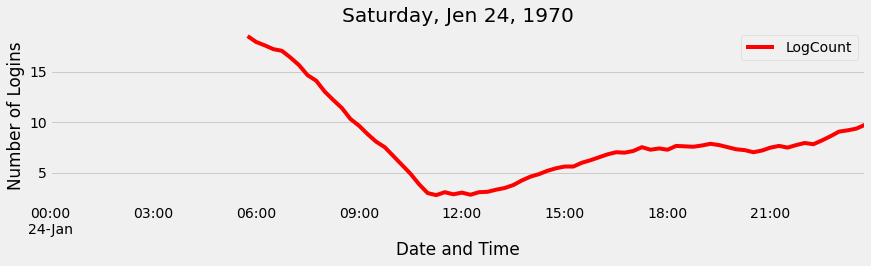

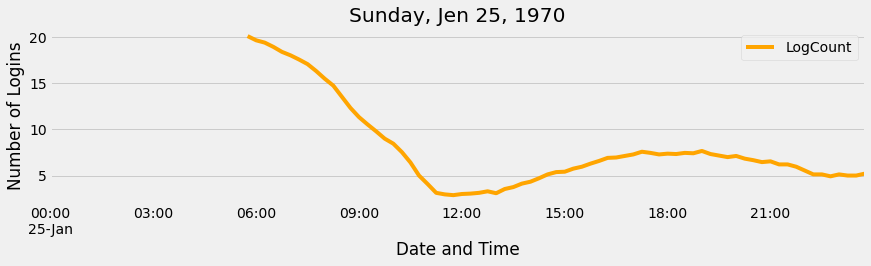

In [16]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-24'].rolling(window=24).mean().plot(figsize=(13,3), color='r', title= 'Saturday, Jen 24, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-25'].rolling(window=24).mean().plot(figsize=(13,3), color='orange', title= 'Sunday, Jen 25, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')

On the weekend I can see high volume of logins around 04:00

In [17]:
df_Hours = df_15m
df_Hours['Hours'] = pd.DatetimeIndex(df_Hours.index).hour
df_Hours.head()

,LogCount,WeekDay,Month,Hours
login_time,,,,
1970-01-01 20:00:00,2,Thursday,January,20
1970-01-01 20:15:00,6,Thursday,January,20
1970-01-01 20:30:00,9,Thursday,January,20
1970-01-01 20:45:00,7,Thursday,January,20
1970-01-01 21:00:00,1,Thursday,January,21


# Let's check all week days over time

Text(0.5, 1.0, 'Week Days Logins Over Time')

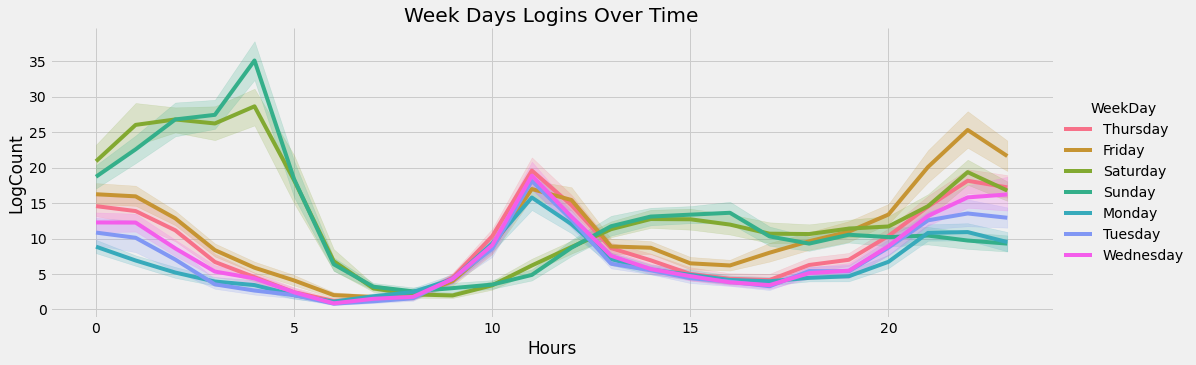

In [18]:
sns.relplot(data=df_Hours, x = 'Hours', y= 'LogCount', kind='line',hue='WeekDay',aspect=15/5)
plt.title('Week Days Logins Over Time')

Let's check which month has the most logins

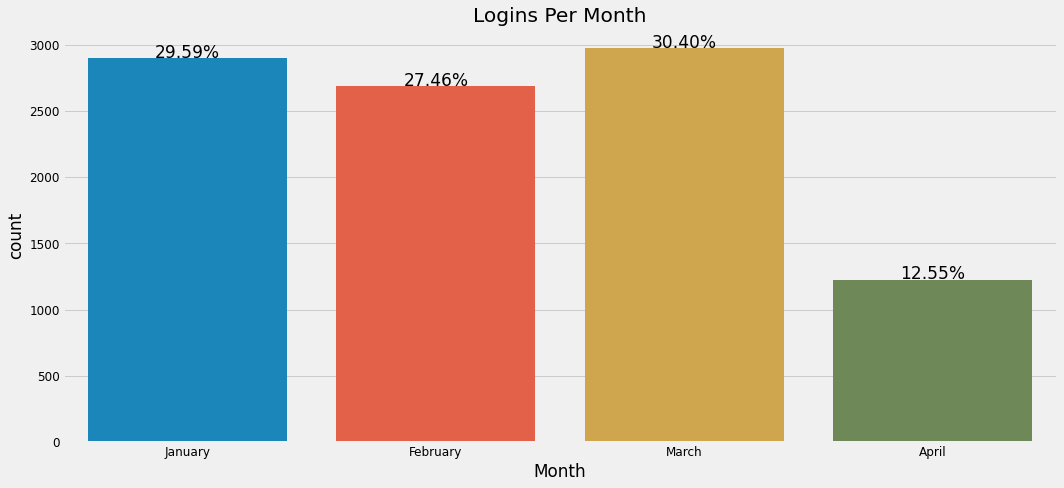

In [19]:
plt.figure(figsize=(15,7))
total = len(df_15m.LogCount)
ax = sns.countplot(x='Month', data=df_15m)


for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)

plt.yticks(size = 12)
plt.xticks(size = 12)

plt.title('Logins Per Month')
plt.tight_layout()

March has the highest volume of logins

# **Part 2 ‐ Experiment and metrics design**    

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

**1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?**

My measure of success would be amount of trips between Gotham and Metropolis. The higher amount of trips, the more I know that people are taking advantage of the new tall reimbursement program.

**2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:**    

**a) How you will implement the experiment:**    
I will roll out the reimbursement program for some time, for example 3 month. I will analyse the data to see if I got an increase in complete rides between cities

**b) What statistical test(s) you will conduct to verify the significance of the observation:**    
I would use Logistic Regression and RandomForest Classifier to verify the significance of the observation

**c) How you would interpret the results and provide recommendations to the city operations team along with any caveats:**    
I will calculate p-value to determine if the difference is statistically significant.     
If the p-value is higher then the null hypthesis that the toll reimbursement having no effect, would not be rejected.      
If the p-value is lower then I will rejected the null hypothesis and conferm that the toll reimbursement has a positive impact on the complete rides.



# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Data description              
● **city:** city this user signed up in               
● **phone:** primary device for this user                              
● **signup_date:** date of account registration; in the form ‘YYYYMMDD’               
● **last_trip_date:** the last time this user completed a trip; in the form ‘YYYYMMDD’                   
● **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup      
● **avg_rating_by_driver:** the rider’s average rating over all of their trips         
● **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips                
● **surge_pct:** the percent of trips taken with surge multiplier > 1            
● **avg_surge:** The average surge multiplier over all of this user’s trips      
● **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up             
● **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise            
● **weekday_pct:** the percent of the user’s trips occurring during a weekday

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from datetime import datetime

In [21]:
df = pd.read_json('ultimate_data_challenge.json',convert_dates=['last_trip_date', 'signup_date'])

In [22]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### Active vs Not Active in last 30 days

Creating 'active' column:      
1. from the last day of 'last_trip_date' column I am taking 30 days     
2. if there is a trip in last 30 days assignment 1      
3. if there is no trip in last 30 days assignment 0

In [24]:
df['active'] = df['last_trip_date'].apply(lambda date: 1 if (df.last_trip_date.max() - date).days < 30 else 0)

In [25]:
df['active'].value_counts()

0    31690
1    18310
Name: active, dtype: int64

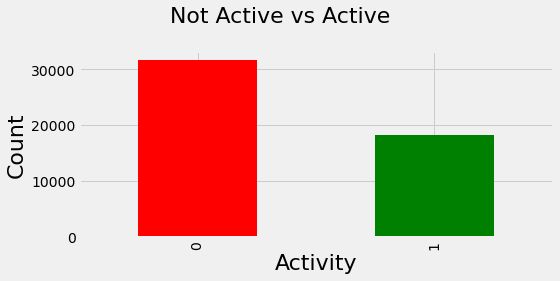

In [26]:
c = ['red', 'green']
plt.suptitle('Not Active vs Active', fontsize=22)
plt.ylabel('ylabel', fontsize=22)
plt.xlabel('ylabel', fontsize=22)
df['active'].value_counts().plot(kind='bar',color=c,figsize=(8, 4), ylabel='Count', xlabel = 'Activity')
plt.tight_layout()

In [27]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4


Visualizing correlation between features

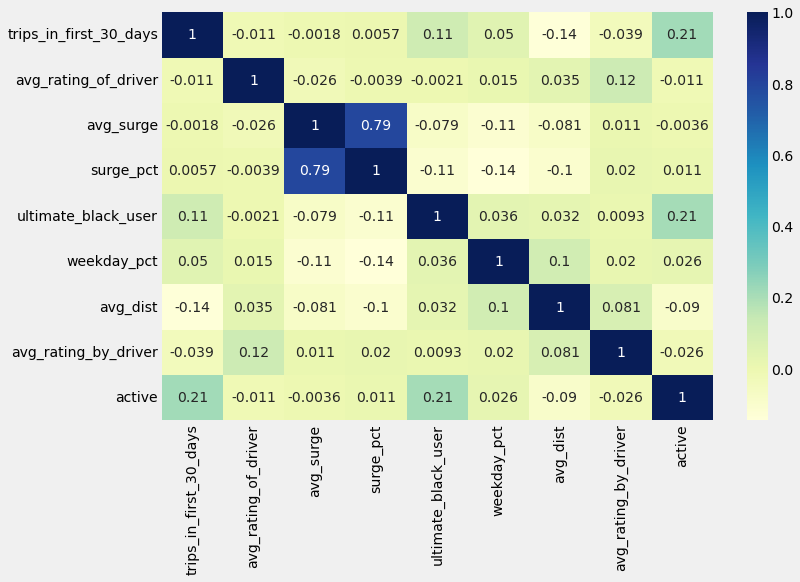

In [28]:
sns.heatmap(df.corr(), yticklabels=True, annot=True, cmap="YlGnBu")
plt.gcf().set_size_inches(11, 7)

I am going to remove columns that not going to be used

In [29]:
df = df.drop(['last_trip_date', 'phone', 'signup_date'], axis=1)
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5.0,5.0,5.0,4.9,4.9
active,1,0,0,1,0


Creating dummy encode all the categorical variables

In [30]:
df_d = pd.get_dummies(df, columns=['ultimate_black_user', 'city'], drop_first=True)
df_d.head().T

,0,1,2,3,4
trips_in_first_30_days,4.00,0.00,3.00,9.00,14.00
avg_rating_of_driver,4.70,5.00,4.30,4.60,4.40
avg_surge,1.10,1.00,1.00,1.14,1.19
surge_pct,15.40,0.00,0.00,20.00,11.80
weekday_pct,46.20,50.00,100.00,80.00,82.40
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5.00,5.00,5.00,4.90,4.90
active,1.00,0.00,0.00,1.00,0.00
ultimate_black_user_True,1.00,0.00,0.00,1.00,0.00
city_King's Landing,1.00,0.00,0.00,1.00,0.00


Checking NaN

In [31]:
df_d.isna().sum()

trips_in_first_30_days         0
avg_rating_of_driver        8122
avg_surge                      0
surge_pct                      0
weekday_pct                    0
avg_dist                       0
avg_rating_by_driver         201
active                         0
ultimate_black_user_True       0
city_King's Landing            0
city_Winterfell                0
dtype: int64

Droping all the NaNs

In [32]:
df_clean = df_d.dropna(axis='columns')
df_clean.isna().sum()

trips_in_first_30_days      0
avg_surge                   0
surge_pct                   0
weekday_pct                 0
avg_dist                    0
active                      0
ultimate_black_user_True    0
city_King's Landing         0
city_Winterfell             0
dtype: int64

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Lets do Logistic Regression

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [35]:
X = df_clean.drop(columns = ['active'])
y = df_clean['active']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

LogR_model = LogisticRegression()

LogR_model.fit(x_train, y_train)

predictions_LogR = LogR_model.predict(x_test)

In [36]:
confusion_matrix(y_test, predictions_LogR)

array([[5533,  784],
       [2150, 1533]], dtype=int64)

In [37]:
print(accuracy_score(LogR_model.predict(x_test), y_test))

print(classification_report(y_test, predictions_LogR))

0.7066
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      6317
           1       0.66      0.42      0.51      3683

    accuracy                           0.71     10000
   macro avg       0.69      0.65      0.65     10000
weighted avg       0.70      0.71      0.69     10000



# Logistic Regression Hyperparameter Tuning

In [38]:
X = df_clean.drop(columns = ['active'])
y = df_clean['active']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LR_mod = LogisticRegression(max_iter = 10000)

grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_GS = GridSearchCV(LR_mod, grid, cv = 10)

LR_GS.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [39]:
print("tuned hpyerparameters :(best parameters) ",LR_GS.best_params_)
print("accuracy :",LR_GS.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10}
accuracy : 0.7101999999999999


# Random Forest Classifier

In [40]:
X = df_clean.drop(columns = ['active'])
y = df_clean['active']

RF_m = RandomForestClassifier(n_estimators = 500, max_depth = 2, 
                             max_features = 3, bootstrap = True, random_state = 18).fit(x_train, y_train)

prediction_RF = RF_m.predict(x_test)

In [41]:
confusion_matrix(y_test, prediction_RF)

array([[5725,  626],
       [2053, 1596]], dtype=int64)

In [42]:
print(accuracy_score(RF_m.predict(x_test), y_test))

print(classification_report(y_test, prediction_RF))

0.7321
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      6351
           1       0.72      0.44      0.54      3649

    accuracy                           0.73     10000
   macro avg       0.73      0.67      0.68     10000
weighted avg       0.73      0.73      0.71     10000



# Random Forest Hyperparameter Tuning

In [43]:
X = df_clean.drop(columns = ['active'])
y = df_clean['active']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


n_estimators = [0.01, 0.1, 1, 10, 100]
max_depth = [30]
min_samples_split = [1, 2, 4]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

RF_mod = RandomForestClassifier()

RF_GS = GridSearchCV(estimator = RF_mod, param_grid = param_grid, verbose=2, cv=4, n_jobs=1)

RF_GS.fit(x_train, y_train)

RF_GS.best_params_

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.1; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.1; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.1; total time=   0.0s
[CV] END max_depth=30, min_samples_split=1, n_estimators=0.1; total time=   0.0s
[CV] END ..max_depth=30, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END ..max_depth=30, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END ..max_depth=30, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END ..max_depth=30, min_samples_split=1

{'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 100}

In [44]:
print(f'Train Accuracy - : {RF_GS.score(x_train, y_train):.3f}')

print(f'Test Accuracy - : {RF_GS.score(x_test, y_test):.3f}')

Train Accuracy - : 0.960
Test Accuracy - : 0.732


# ROC Curve

In [45]:
from sklearn.metrics import roc_curve, make_scorer
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

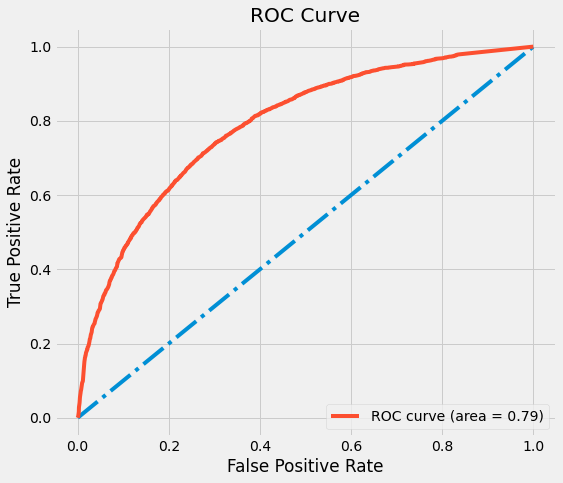

In [46]:
X = df_clean.drop(columns = ['active'])
y = df_clean['active']


roc_model = RF_GS.best_estimator_.fit(x_train, y_train)

p_p = roc_model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, p_p)
auc_score = roc_auc_score(y_test, p_p)

_ = sns.lineplot(x=[0,1], y=[0,1], linestyle='-.')
_ = sns.lineplot(x=fpr, y=tpr, label='ROC curve (area = %0.2f)' % auc_score)
_ = plt.gcf().set_size_inches(8, 7)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.legend(loc="lower right")

Information gained from this models can be used for targeting future incentives to maintain activity levels.